# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as ss

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents

In [2]:
# Run this code:

salaries = pd.read_csv('../Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examine the `salaries` dataset using the `head` function below.

In [3]:
salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


In [4]:
salaries.dtypes

Name                  object
Job Titles            object
Department            object
Full or Part-Time     object
Salary or Hourly      object
Typical Hours        float64
Annual Salary        float64
Hourly Rate          float64
dtype: object

We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [21]:
isna_stats = pd.DataFrame(data=100*salaries.isna().sum()/len(salaries), columns=["NaN in pct"])
isna_stats

,NaN in pct
Name,0.000000
Job Titles,0.000000
Department,0.000000
Full or Part-Time,0.000000
Salary or Hourly,0.000000
Typical Hours,75.824971
Annual Salary,24.175029
Hourly Rate,75.824971


Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [26]:
salaries.groupby('Salary or Hourly').agg('count')['Name']

Salary or Hourly
Hourly     8022
Salary    25161
Name: Name, dtype: int64

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [31]:
salaries = salaries.assign(persons=1)
salaries.groupby('Department').agg('count')['persons']


Department
ADMIN HEARNG                39
ANIMAL CONTRL               81
AVIATION                  1629
BOARD OF ELECTION          107
BOARD OF ETHICS              8
BUDGET & MGMT               46
BUILDINGS                  269
BUSINESS AFFAIRS           171
CITY CLERK                  84
CITY COUNCIL               411
COMMUNITY DEVELOPMENT      207
COPA                       116
CULTURAL AFFAIRS            65
DISABILITIES                28
DoIT                        99
FAMILY & SUPPORT           615
FINANCE                    560
FIRE                      4641
GENERAL SERVICES           980
HEALTH                     488
HUMAN RELATIONS             16
HUMAN RESOURCES             79
INSPECTOR GEN               87
LAW                        407
LICENSE APPL COMM            1
MAYOR'S OFFICE              85
OEMC                      2102
POLICE                   13414
POLICE BOARD                 2
PROCUREMENT                 92
PUBLIC LIBRARY            1015
STREETS & SAN             21

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

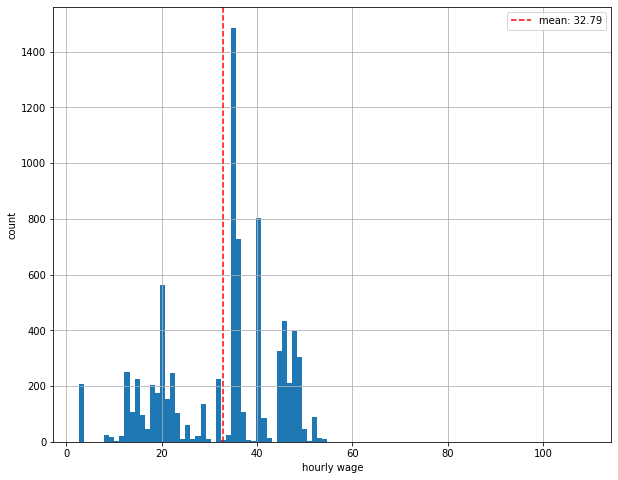

In [58]:
# getting an overview of the data
salaries_hrly = salaries[salaries['Salary or Hourly'] == 'Hourly']
hrly_sales_mean = salaries_hrly['Hourly Rate'].mean()

fig, ax = plt.subplots(figsize=(10,8))
salaries_hrly['Hourly Rate'].hist(bins=100, ax=ax)
ax.axvline(x=hrly_sales_mean,
           c='r',
           linestyle='--',
           label=f'mean: {round(hrly_sales_mean,2)}',
          )
ax.set_xlabel('hourly wage')
ax.set_ylabel('count')
ax.legend()

In [61]:
import scipy

In [70]:
salaries_hrly

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate,ones,persons,col30
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86,1,1,30
6,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,F,Hourly,40.0,NaN,46.10,1,1,30
7,"ABBATE, JOSEPH L",POOL MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,NaN,35.60,1,1,30
10,"ABBOTT, BETTY L",FOSTER GRANDPARENT,FAMILY & SUPPORT,P,Hourly,20.0,NaN,2.65,1,1,30
18,"ABDULLAH, LAKENYA N",CROSSING GUARD,OEMC,P,Hourly,20.0,NaN,17.68,1,1,30
...,...,...,...,...,...,...,...,...,...,...,...
33164,"ZUREK, FRANCIS",ELECTRICAL MECHANIC,OEMC,F,Hourly,40.0,NaN,46.10,1,1,30
33168,"ZWARYCZ MANN, IRENE A",CROSSING GUARD,OEMC,P,Hourly,20.0,NaN,17.68,1,1,30
33169,"ZWARYCZ, THOMAS J",POOL MOTOR TRUCK DRIVER,WATER MGMNT,F,Hourly,40.0,NaN,35.60,1,1,30
33174,"ZYGADLO, JOHN P",MACHINIST (AUTOMOTIVE),GENERAL SERVICES,F,Hourly,40.0,NaN,46.35,1,1,30


In [69]:
salaries_hrly = salaries_hrly.assign(col30 = 30)
ss.ttest_ind(salaries_hrly['Hourly Rate'],
             salaries_hrly['col30'],
             equal_var=False,
            )

Ttest_indResult(statistic=20.6198057854942, pvalue=4.3230240486229894e-92)

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [78]:
salaries_police_ann = salaries[(salaries['Department'] == 'POLICE') & (~salaries['Annual Salary'].isna())]

ss.ttest_1samp(salaries_police_ann['Annual Salary'], 86000)


Ttest_1sampResult(statistic=3.081997005712994, pvalue=0.0020603403550965137)

Using the `crosstab` function, find the department that has the most hourly workers. 

In [9]:
# Your code here:



The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [10]:
# Your code here:



# Challenge 3 - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [11]:
# Your code here:



Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [12]:
# Your code here:



# Bonus Challenge - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [13]:
# Your code here:

